In [9]:
import sys
import os
os.chdir(sys.path[3])
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)



In [7]:
import geopandas as gpd
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from matplotlib.pyplot import figure
from tabulate import tabulate

### Upload Data

In [18]:
data_general = pd.read_csv(r'data/process/new_data.csv', skiprows=[1, 2]).reset_index()


## Data by:
1. California
2. Alberta
3. Washington

In [ ]:
data_states = pd.read_csv(r'data/process/res_stolen_loc_splitted.csv', skiprows=[1, 2]).reset_index()

In [21]:
cols = ['Total','California','Alberta','Washington','other']
per_cols = ['per_'+ col for col in cols[:-1]]
per_cols_by_ans = ['per_2_'+ col for col in cols[1:]]
colors =['red','blue','green','orange']

In [22]:
def count_per_city_question_var(my_data: DataFrame, old_name: str, new_name: str, is_state: str, per_name_def:str):
    # For total work with all data anf for state work only with the state in @is_state
    # Select only the data of question name (@old_name)
    if is_state == 'Total':
        rel_demographic = DataFrame(my_data[old_name])
    else:
        rel_demographic = DataFrame(my_data[my_data['state'] == is_state][old_name])
    # Rearrange data
    rel_demographic = rel_demographic.rename(columns={old_name: new_name})
    rel_demographic = rel_demographic[rel_demographic[new_name].notna()].reset_index()

    # calculate absolute and relative count for each veritable
    sum_temp = rel_demographic.groupby(by=[new_name]).count().rename(columns={'index': is_state})
    sum_temp[per_name_def] = sum_temp[is_state] / sum_temp[is_state].sum() * 100
    return sum_temp

## All the demographic parameters

In [41]:
data_store= []
# The coe run over each tuple
for pair in {'Q2':'part','Q4':'year','Q5':'month','Q6':'day_time','Q7':'is_locked','Q8':'locked_type','Q9':'theft_location','Q10':'is_regi','Q11':'report_loc','Q12':'is_insured','Q14':'is_electric','Q15':'bike_type','Q17':'is_university','Q19':'is_online','Q21':'is_police_assist','Q23':'recovery_loc','Q24':'con_recovery','Q34': 'birth', 'Q35': 'gender', 'Q36': 'income', 'Q38': 'education', 'Q39': 'ethnic_origin'}.items():
    print(pair)
    # Get the question number and its new name
    question_number = pair[0]
    per_name = pair[1]
    # count stat per state/total and question_number
    sumy = count_per_city_question_var(data_general, old_name=question_number, new_name=per_name, is_state=cols[0],per_name_def=per_cols[0])
    for i,name in enumerate(cols[1:-1]):
        temp_per_name = per_cols[i+1]
        sumy[[name, temp_per_name]] = count_per_city_question_var(data_states, old_name=question_number,
                                                                  new_name=per_name,
                                                                  is_state=name, per_name_def=temp_per_name)
    if per_name == 'birth':
        sumy.index = sumy.index.astype('int32')
    # add the new data to datastore which will present latter
    data_store.append(sumy.fillna(0).astype('int32'))

('Q2', 'part')
('Q4', 'year')
('Q5', 'month')
('Q6', 'day_time')
('Q7', 'is_locked')
('Q8', 'locked_type')
('Q9', 'theft_location')
('Q10', 'is_regi')
('Q11', 'report_loc')
('Q12', 'is_insured')
('Q14', 'is_electric')
('Q15', 'bike_type')
('Q17', 'is_university')
('Q19', 'is_online')
('Q21', 'is_police_assist')
('Q23', 'recovery_loc')
('Q24', 'con_recovery')
('Q34', 'birth')
('Q35', 'gender')
('Q36', 'income')
('Q38', 'education')
('Q39', 'ethnic_origin')


In [ ]:
# ## the next code is appliciable only for birth year
#
# df  = data_store[-5]
# df_b_year = df.reset_index()
# df_b_year['year_group']=''
# df_b_year.loc[df_b_year['birth']>1950]['year_group'] = 50
# df_b_year

In [ ]:
df  = data_store[1]
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100


In [118]:
## It combines two real and percentage itno one column
def prep_for_export(test):
    real = test[cols[1:]].apply(lambda x: str(int(x))).reset_index(drop=True)
    per = test[per_cols_by_ans].apply(lambda x: ' ('  + str(int(round(x,0))) + '%' + ')').reset_index(drop=True)
    return real + per


In [204]:
df
temp_sum = df.Total.sum(axis=0)
rem_df = df[df['Total']<temp_sum/10]
print('those are not include in the results presentation since less than 10%  {}'.format(rem_df.index.values))
new_df = df[df['Total']>temp_sum/10]
df_table= DataFrame(columns=cols[1:])
df_table[df_table.columns] = new_df.apply(lambda x: prep_for_export(x),axis=1)
df_table.to_csv('python/notebooks/per_state/'+df_table.index.name +'.csv')

,Total,per_Total,California,per_California,Alberta,per_Alberta,Washington,per_Washington,per_2_California,per_2_Alberta,per_2_Washington,other,per_2_other
year,,,,,,,,,,,,,
2017,45,2,16,2,7,3,0,0,35.555556,15.555556,0.000000,22,48.888889
2018,54,3,12,1,9,5,5,3,22.222222,16.666667,9.259259,28,51.851852
2019,262,16,82,13,32,18,37,28,31.297710,12.213740,14.122137,111,42.366412
2020,325,21,138,22,39,22,25,19,42.461538,12.000000,7.692308,123,37.846154
2021,695,44,268,44,69,38,55,42,38.561151,9.928058,7.913669,303,43.597122
2022,159,10,85,14,21,11,7,5,53.459119,13.207547,4.402516,46,28.930818
Don’t know/not sure,7,0,1,0,0,0,0,0,14.285714,0.000000,0.000000,6,85.714286


those are not include in the results presentation since less than 10%  ['2017' '2018' 'Don’t know/not sure']


In [77]:
new_df

,Total,per_Total,California,per_California,Alberta,per_Alberta,Washington,per_Washington,per_2_California,per_2_Alberta,per_2_Washington,other,per_2_other
year,,,,,,,,,,,,,
2019,262,16,82,13,32,18,37,28,31.297710,12.213740,14.122137,111,42.366412
2020,325,21,138,22,39,22,25,19,42.461538,12.000000,7.692308,123,37.846154
2021,695,44,268,44,69,38,55,42,38.561151,9.928058,7.913669,303,43.597122
2022,159,10,85,14,21,11,7,5,53.459119,13.207547,4.402516,46,28.930818


In [172]:
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = new_df[per_cols_by_ans]

╒════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│   year │   Total │   California │   Alberta │   Washington │   other │
╞════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│   2019 │     262 │           82 │        32 │           37 │     111 │
├────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│   2020 │     325 │          138 │        39 │           25 │     123 │
├────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│   2021 │     695 │          268 │        69 │           55 │     303 │
├────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│   2022 │     159 │           85 │        21 │            7 │      46 │
╘════════╧═════════╧══════════════╧═══════════╧══════════════╧═════════╛
|   year |   California |   Alberta |   Washington |   other |
|-------:|-------------:|----------:|-------------:|--------:|
|   2019 |           31 |        12 |           14 |      42 |
|   2020

<AxesSubplot:xlabel='year'>

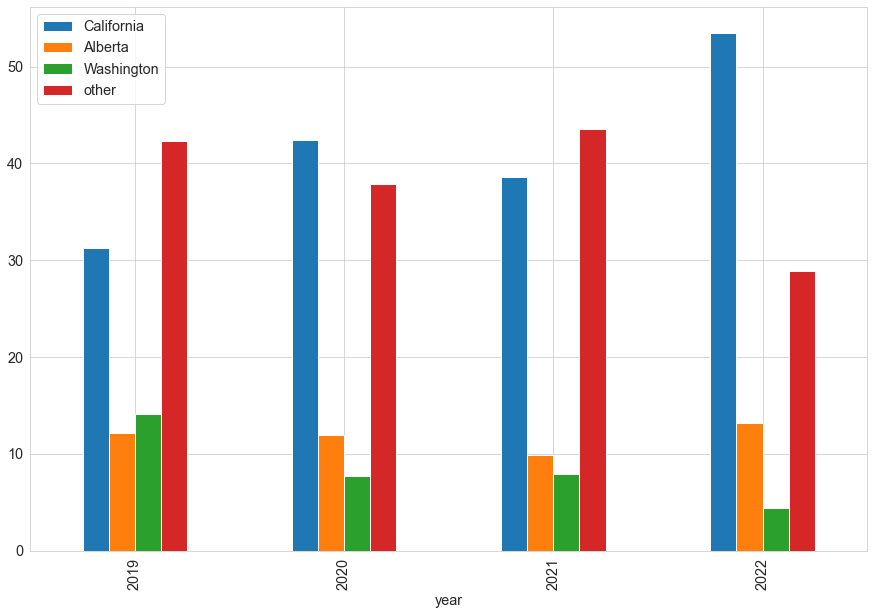

In [124]:

# print(tabulate(new_df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
# print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar()
plt.savefig('python/notebooks/per_state/'+df_table.index.name +'.png')


In [198]:
find_max= df_show.copy()
find_max
res= (abs(find_max.mean() - find_max).idxmax())
def is_intersting_def(temp_col):
    df_filter = temp_col.reset_index()
    outlier_place = df_filter.columns[-1]
    outlier_att = res[outlier_place]
    is_intersting = df_filter[df_filter['year']==outlier_att]
    new_mean = df_filter[df_filter['year']!=outlier_att][outlier_place].mean()
    new_std = df_filter[df_filter['year']!=outlier_att][outlier_place].std()
    if (abs(is_intersting[outlier_place] - new_mean) - new_std*2.5  > 0).any():
        print ('for {} : {} is outlier (new_mean:{}, new_std:{})'.format(outlier_place,outlier_att,round(new_mean,2),round(new_std,2)))
res =find_max.apply(is_intersting_def)

,California,Alberta,Washington,other
year,,,,
2019,31.297710,12.213740,14.122137,42.366412
2020,42.461538,12.000000,7.692308,37.846154
2021,38.561151,9.928058,7.913669,43.597122
2022,53.459119,13.207547,4.402516,28.930818


for California : 2022 is outlier (new_mean:37.44, new_std:5.67)
for Alberta : 2021 is outlier (new_mean:12.47, new_std:0.64)
for Washington : 2019 is outlier (new_mean:6.67, new_std:1.97)
for other : 2022 is outlier (new_mean:41.27, new_std:3.03)


╒═════════════════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│ year                │   Total │   California │   Alberta │   Washington │   other │
╞═════════════════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│ 2017                │      45 │           16 │         7 │            0 │      22 │
├─────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ 2018                │      54 │           12 │         9 │            5 │      28 │
├─────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ 2019                │     262 │           82 │        32 │           37 │     111 │
├─────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ 2020                │     325 │          138 │        39 │           25 │     123 │
├─────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ 2021                │     695 │          268 │      

<AxesSubplot:xlabel='year'>

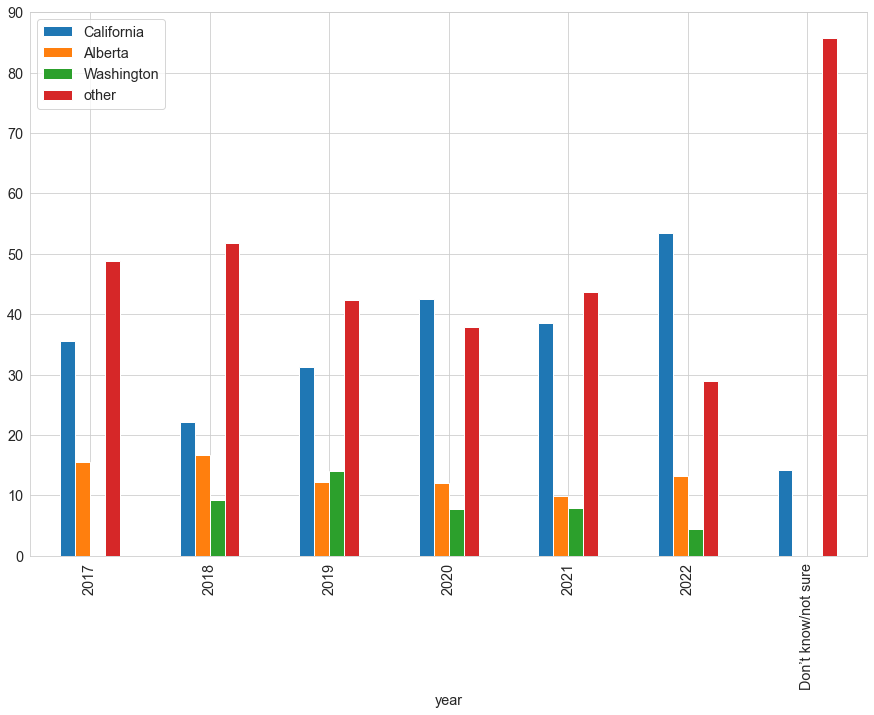

In [70]:
df  = data_store[1]
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = df[per_cols_by_ans]

print(tabulate(df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar()

╒═══════════════════════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│ gender                    │   Total │   California │   Alberta │   Washington │   other │
╞═══════════════════════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│ Man                       │    1060 │          440 │       123 │           89 │     408 │
├───────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Non-binary / third gender │      21 │            9 │         1 │            1 │      10 │
├───────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Prefer not to say         │      35 │           11 │         4 │            3 │      17 │
├───────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Woman                     │     614 │          213 │        89 │           51 │     261 │
╘═══════════════════════════╧═════════╧══════════════╧═══════════╧══════════════

<AxesSubplot:xlabel='gender'>

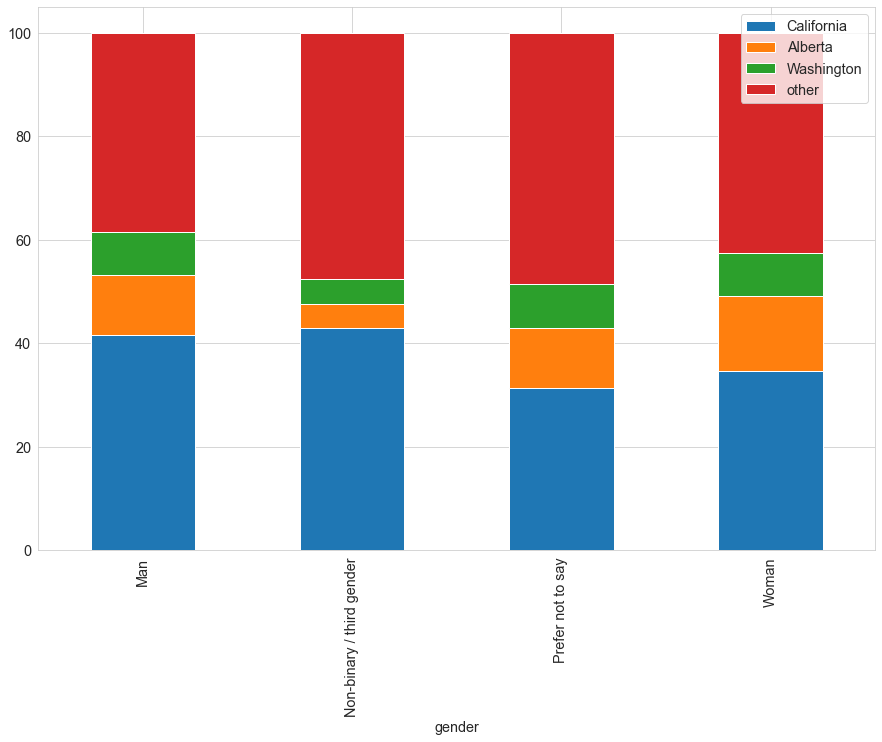

In [33]:
df  = data_store[2]
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = df[per_cols_by_ans]

print(tabulate(df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar(stacked=True)

╒════════════════════════════════════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│ income                                 │   Total │   California │   Alberta │   Washington │   other │
╞════════════════════════════════════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│ $200,000 or more per year              │     362 │          195 │        26 │           30 │     111 │
├────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Between $100,000 and $149,999 per year │     272 │           97 │        39 │           29 │     107 │
├────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Between $150,000 and $199,999 per year │     174 │           74 │        18 │           18 │      64 │
├────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Between $20,000 and $34,999 per year   │     111 │   

<AxesSubplot:xlabel='income'>

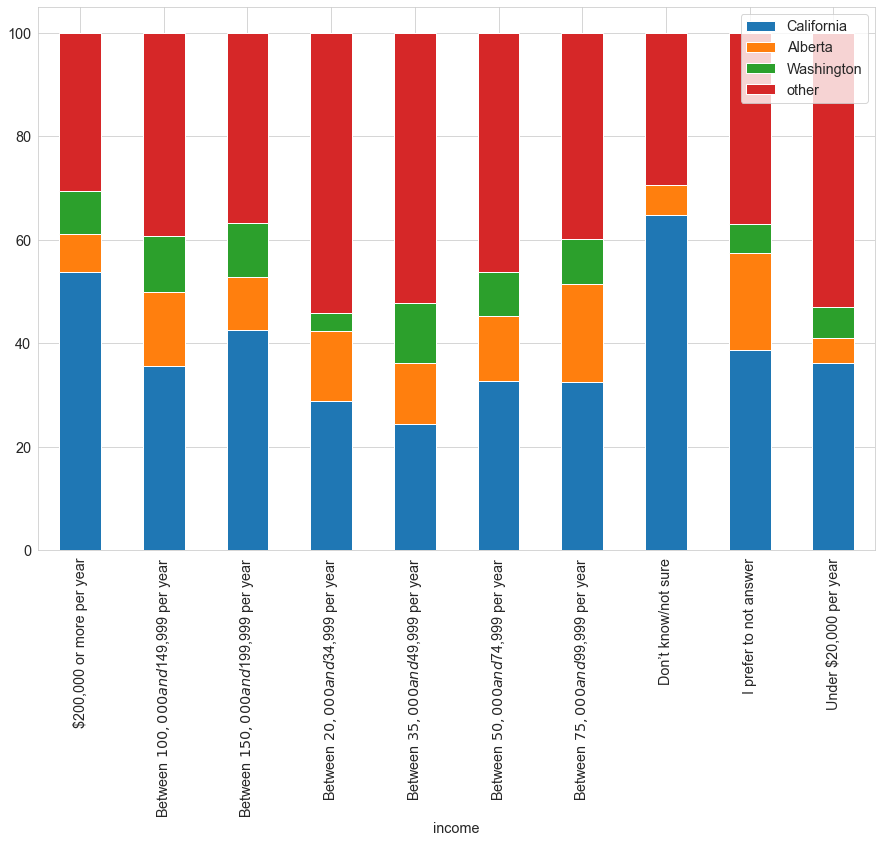

In [34]:
df  = data_store[3]
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = df[per_cols_by_ans]

print(tabulate(df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar(stacked=True)

╒═══════════════════════════════════════════════════════════════════════════════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│ education                                                                         │   Total │   California │   Alberta │   Washington │   other │
╞═══════════════════════════════════════════════════════════════════════════════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│ Associate’s/vocational/technical degree (2- or 3-year degree, trades certificate) │     110 │           27 │        38 │            3 │      42 │
├───────────────────────────────────────────────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Bachelor’s degree (university 4-year degree)                                      │     672 │          257 │        80 │           65 │     270 │
├───────────────────────────────────────────────────────────────────────────────────┼─────────┼──────────────┼──

<AxesSubplot:xlabel='education'>

C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


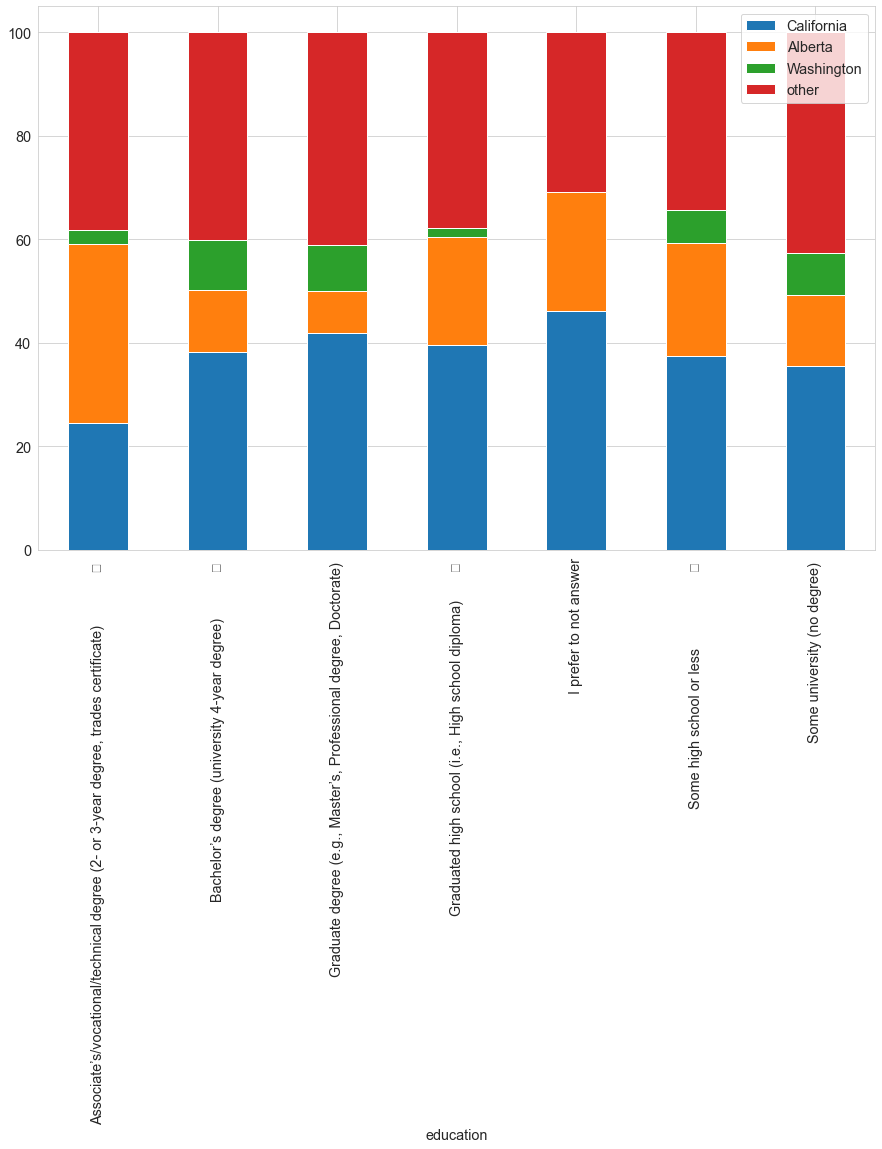

In [35]:

df  = data_store[4]
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = df[per_cols_by_ans]

print(tabulate(df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar(stacked=True)

╒════════════════════════════════════════════════════════════════════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│ ethnic_origin                                                          │   Total │   California │   Alberta │   Washington │   other │
╞════════════════════════════════════════════════════════════════════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│ African (e.g., Moroccan, Ghanaian, South African, etc.)                │      19 │           10 │         0 │            0 │       9 │
├────────────────────────────────────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Asian (e.g., Chinese, Filipino, Korean, etc.)                          │      84 │           50 │         9 │            3 │      22 │
├────────────────────────────────────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Caribbean (e.g., Cuban, Jamaican, Bajan

<AxesSubplot:xlabel='ethnic_origin'>

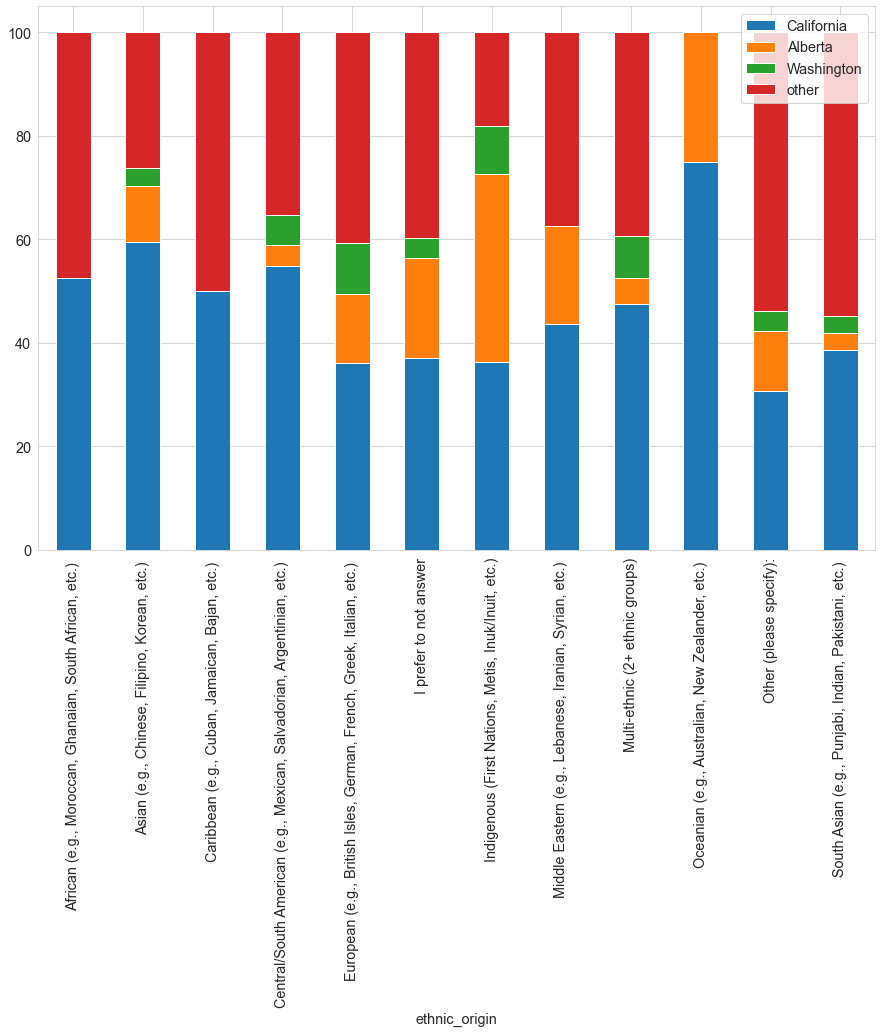

In [36]:
df  = data_store[5]
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = df[per_cols_by_ans]

print(tabulate(df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar(stacked=True)